In [21]:
import numpy as np
import pandas as pd
import sys
import os.path
import matplotlib.pyplot as plt

from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline



In [22]:
## Prepare Data 

# Load data 
file_path = os.getcwd() + "/data"
train_df = pd.read_csv(file_path + '/train.csv')
# print train_df.head()
test_df = pd.read_csv(file_path + '/test.csv')
# print test_df.head()

target = train_df['Cover_Type']
train_df = train_df.drop('Cover_Type', 1)
train_df = train_df.drop('Id',1)

# Split into Train, Dev, Test Sets 
predictors = train_df.columns
l = len(target)
X_train, X_dev, y_train, y_dev = train_test_split(train_df, target, test_size=0.30, random_state=42)
print "Train data size %i X %i" % (X_train.shape[0], X_train.shape[1])
print "Test data size %i X %i" % (X_dev.shape[0], X_dev.shape[1])


Train data size 10584 X 54
Test data size 4536 X 54


### Decision Tree Search

In [37]:
# Grid Search with Decision Tree
# 'max_leaf_nodes' = [1,3,5]

tree_para = {'criterion':['gini','entropy'],
             'min_samples_split': np.linspace(2, 200, 50, endpoint=True, dtype = int),
             'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

tree_para = {'criterion':['gini','entropy'],
             'min_samples_split':[3,5],
             'max_depth':[4,5,6]}

clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
clf.fit(X_train, y_train)
print clf.best_params_
print "Best Score %0.2f" % clf.best_score_

dt = DecisionTreeClassifier(criterion=clf.best_params_.get('criterion'),
                           max_depth=clf.best_params_.get('max_depth'))
dt.fit(X_train,y_train)

{'min_samples_split': 3, 'criterion': 'gini', 'max_depth': 6}
Best Score 0.69


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [38]:
feature_importance = dt.feature_importances_
feats_to_use = 15
feats = np.argsort(-feature_importance)[:15]

print "Accuracy Score on Dev Set: %0.2f%%" % (dt.score(X_dev,y_dev))
preds = dt.predict(X_dev)
mse = np.mean((preds - y_dev) ** 2)
print 'Mean squared error = {}'.format(mse)
print 'R^2 = {}'.format(dt.score(X_train, y_train))

print "\nTop 15 Fetaures in Subset Analysis: Dev Accuracy %0.2f%%" % dt.score(X_dev,y_dev) 
print " Feature%-30s | Importance Value" % ''
for i in range(15):
    print "%-2i %-35s |  %0.3f" %(i, X_train.columns[feats[i]], feature_importance[feats[i]])


Accuracy Score on Dev Set: 0.70%
Mean squared error = 2.78240740741
R^2 = 0.708238851096

Top 15 Fetaures in Subset Analysis: Dev Accuracy 0.70%
 Feature                               | Importance Value
0  Elevation                           |  0.666
1  Hillshade_9am                       |  0.066
2  Horizontal_Distance_To_Fire_Points  |  0.043
3  Horizontal_Distance_To_Hydrology    |  0.039
4  Horizontal_Distance_To_Roadways     |  0.034
5  Soil_Type10                         |  0.024
6  Wilderness_Area1                    |  0.022
7  Soil_Type3                          |  0.021
8  Soil_Type4                          |  0.016
9  Soil_Type39                         |  0.011
10 Soil_Type12                         |  0.009
11 Hillshade_3pm                       |  0.008
12 Hillshade_Noon                      |  0.007
13 Soil_Type38                         |  0.006
14 Soil_Type17                         |  0.006


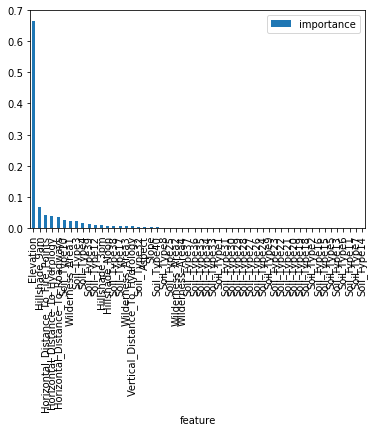

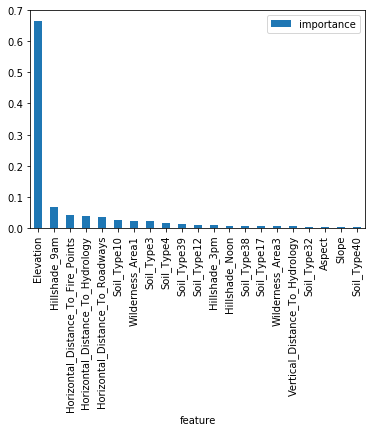

In [39]:
# Report Feature Importnace in DTREE 
importance_df = pd.DataFrame({
        'feature': predictors,
        'importance': dt.feature_importances_
    })

importance_df.sort_values('importance', ascending = False).plot(x='feature', kind='bar')
# only plot importances > 0.001
importance_df1 = importance_df[importance_df['importance'] >= 0.001]
importance_df1.sort_values('importance', ascending = False).plot(x='feature', kind='bar')

### Grid Search with Random Forest 

In [42]:
# Grid Search with Decision Tree
# 'max_leaf_nodes' = [1,3,5]

tree_para = {'n_estimators': np.linspace(1, 100, 50, endpoint=True, dtype = int),
             'criterion':['gini','entropy'],
             'min_samples_split': np.linspace(2, 200, 50, endpoint=True, dtype = int),
             'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

tree_para = {'n_estimators': [1,3,5],
             'criterion':['gini','entropy'],
             'min_samples_split': [2,4],
             'max_depth': [4,5,6]}

clf = GridSearchCV(RandomForestClassifier(), tree_para, cv=5)
clf.fit(X_train, y_train)
print clf.best_params_
print "Best Score %0.2f" % clf.best_score_

rf = DecisionTreeClassifier(criterion=clf.best_params_.get('criterion'),
                           max_depth=clf.best_params_.get('max_depth'))
rf.fit(X_train,y_train)

SyntaxError: invalid syntax (<ipython-input-42-03a44c03c4bd>, line 7)

In [ ]:
feature_importance = rf.feature_importances_
feats_to_use = 15
feats = np.argsort(-feature_importance)[:15]

print "Accuracy Score on Dev Set: %0.2f%%" % (rf.score(X_dev,y_dev))
preds = rf.predict(X_dev)
mse = np.mean((preds - y_dev) ** 2)
print 'Mean squared error = {}'.format(mse)
print 'R^2 = {}'.format(rf.score(X_train, y_train))

print "\nTop 15 Fetaures in Subset Analysis: Dev Accuracy %0.2f%%" % dt.score(X_dev,y_dev) 
print " Feature%-30s | Importance Value" % ''
for i in range(15):
    print "%-2i %-35s |  %0.3f" %(i, X_train.columns[feats[i]], feature_importance[feats[i]])


In [ ]:
# Report Feature Importnace in DTREE 
importance_df = pd.DataFrame({
        'feature': predictors,
        'importance': rf.feature_importances_
    })

importance_df.sort_values('importance', ascending = False).plot(x='feature', kind='bar')
# only plot importances > 0.001
importance_df1 = importance_df[importance_df['importance'] >= 0.001]
importance_df1.sort_values('importance', ascending = False).plot(x='feature', kind='bar')

In [ ]:
# List of best features